In [2]:
from protocol import text_encoder, FS
import matplotlib.pyplot as plt
import numpy as np

Encoding character 0: 1001000
Encoding character 1: 1100101
Encoding character 2: 1101100
Encoding character 3: 1101100
Encoding character 4: 1101111
Encoding character 5: 0101100
Encoding character 6: 0100000
Encoding character 7: 1010111
Encoding character 8: 1101111
Encoding character 9: 1110010
Encoding character 10: 1101100
Encoding character 11: 1100100
Encoding character 12: 0100001
Time used for encoding: 0.00826883316040039 seconds


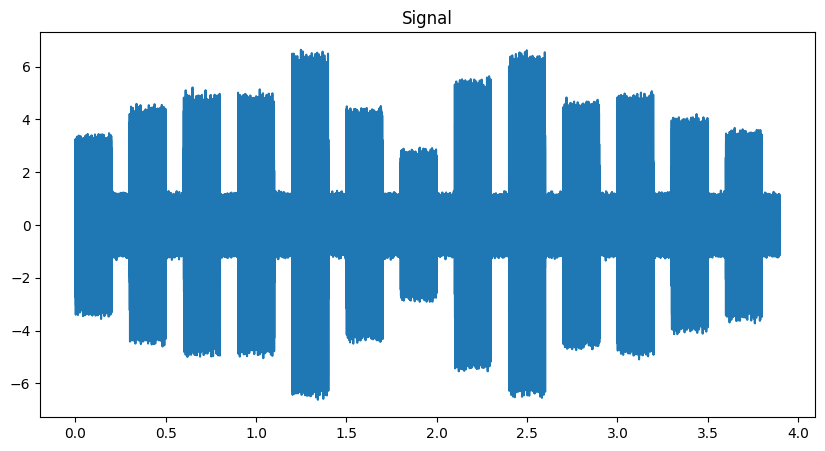

In [3]:
signal = text_encoder("Hello, World!", Gaussian_noise=True)

# Visualize the signal
time = np.arange(len(signal)) / FS
plt.figure(figsize=(10, 5))
plt.plot(time, signal)
plt.title("Signal")
plt.show()

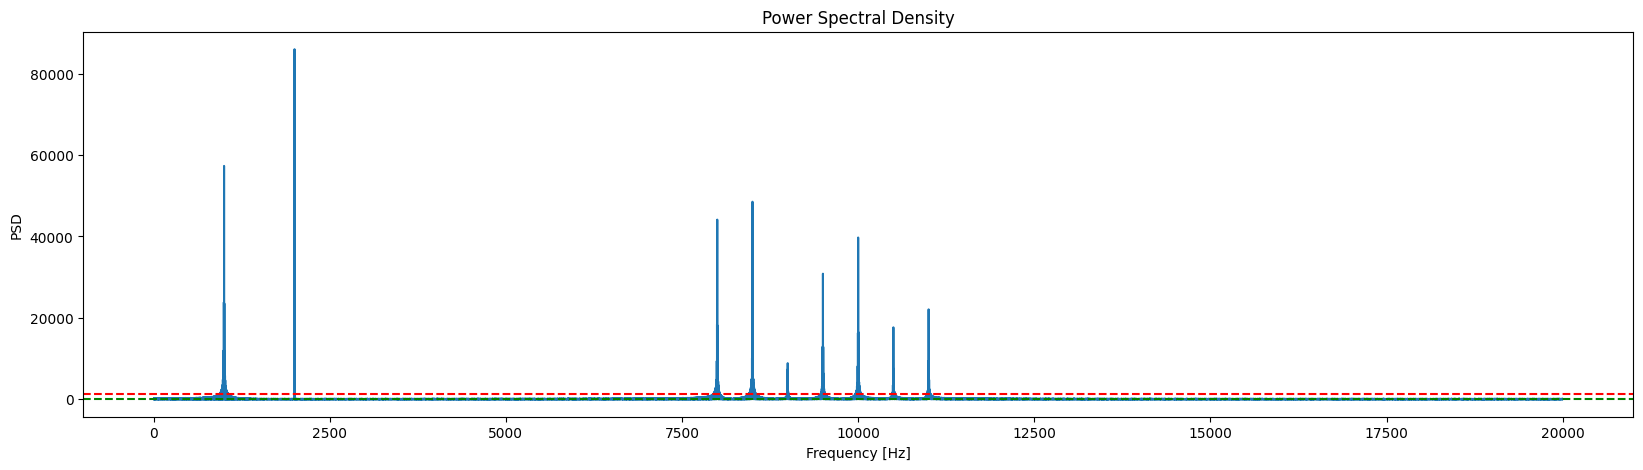

In [5]:
from utils import plot_fft

plot_fft(signal, FS)

[ 6.07750066e-03  9.78143786e-02  1.88803367e-01 ... -3.33800183e-06
 -2.24154047e-06 -1.27736252e-06]


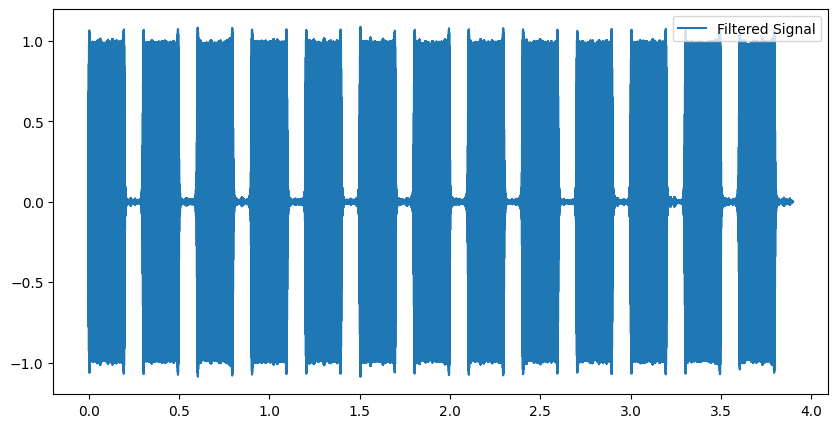

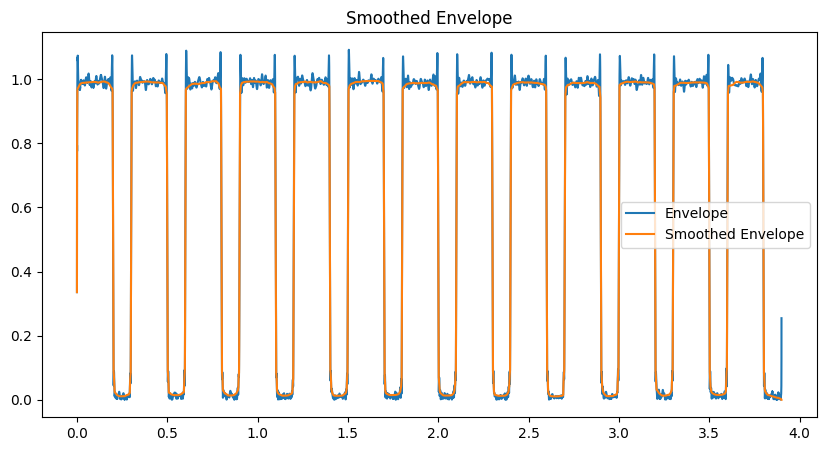

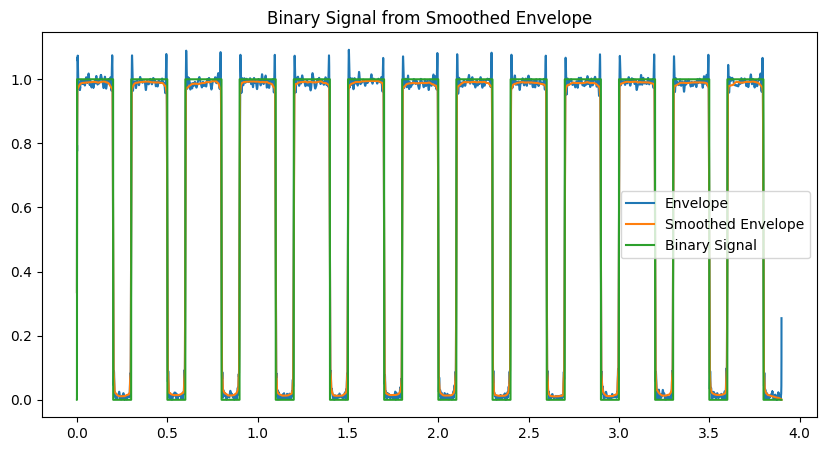

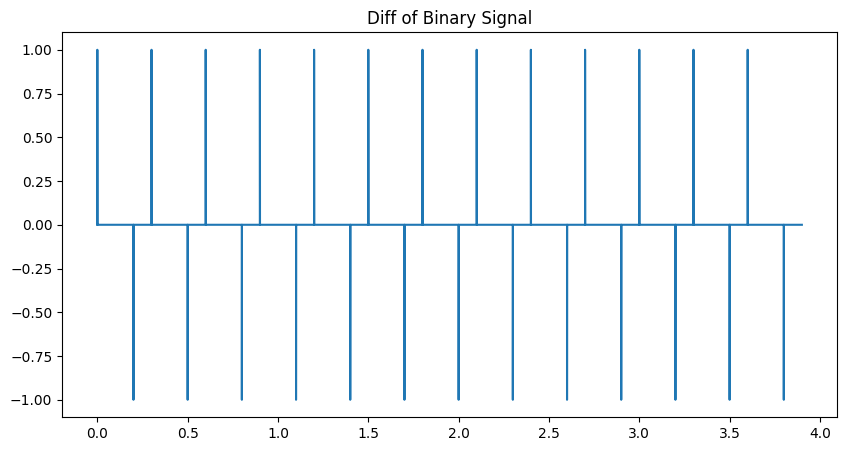

[     2  13229  26453  39686  52917  66152  79378  92608 105836 119068
 132300 145529 158761]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, medfilt
from utils import bandpass_filter

filtered_signal = bandpass_filter(signal, 900, 1100, FS)
print(filtered_signal)

plt.figure(figsize=(10, 5))
# plt.plot(time, signal, label="Signal")
plt.plot(time, filtered_signal, label="Filtered Signal")
plt.legend()
plt.show()

analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)

smoothed_envelope = medfilt(envelope, kernel_size=4411)
plt.figure(figsize=(10, 5))
plt.plot(time, envelope, label="Envelope")
plt.plot(time, smoothed_envelope, label="Smoothed Envelope")
plt.legend()
plt.title("Smoothed Envelope")
plt.show()


threshold = 0.5
# binary_signal = np.where(envelope > threshold, 1, 0)
binary_signal = envelope > threshold


plt.figure(figsize=(10, 5))
plt.plot(time, envelope, label="Envelope")
plt.plot(time, smoothed_envelope, label="Smoothed Envelope")
plt.plot(time, binary_signal, label="Binary Signal")
plt.legend()
plt.title("Binary Signal from Smoothed Envelope")
plt.show()

diff = np.diff(binary_signal.astype(int))
plt.figure(figsize=(10, 5))
plt.plot(time[:-1], diff)
plt.title("Diff of Binary Signal")
plt.show()

onset = np.where(diff > 0)[0]
print(onset)